In [16]:
import numpy as np
import csv
from matplotlib import pyplot as plt
import random
%matplotlib inline
import skimage
import os
from skimage import filters
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize

In [5]:
path = os.getcwd()

In [2]:
## Loading data ##
# Load all training inputs to a python list
train_inputs = []
with open('E:\\Min\\ml\\project3\\data_and_scripts\\data_and_scripts\\train_inputs.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)  # skip the header
    for train_input in reader: 
        train_input_no_id = []
        for pixel in train_input[1:]: # Start at index 1 to skip the Id
            train_input_no_id.append(float(pixel))
        train_inputs.append(train_input_no_id) 

# Load all training ouputs to a python list
train_outputs = []
with open('E:\\Min\\ml\\project3\\data_and_scripts\\data_and_scripts\\train_outputs.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader, None)  # skip the header
    for train_output in reader:  
        train_output_no_id = int(train_output[1])
        train_outputs.append(train_output_no_id)

In [ ]:
## convert_to_numpy ##
# Convert python lists to numpy arrays
train_inputs_np = np.asarray(train_inputs)
train_outputs_np = np.asarray(train_outputs)

# Save as numpy array files
np.save('train_inputs', train_inputs_np)
np.save('train_outputs', train_outputs_np)

In [6]:
## Load numpy array files ##
train_inputs = np.load(path+'\\train_inputs.npy')
train_outputs = np.load(path+'\\train_outputs.npy')


In [7]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

(-0.5, 47.5, 47.5, -0.5)

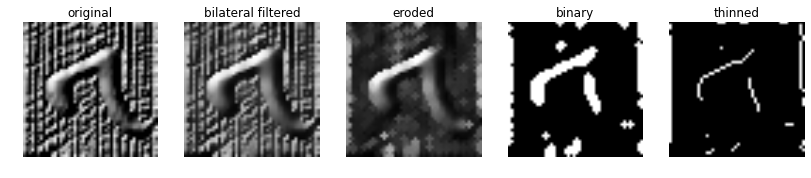

In [28]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(ncols=5, figsize=(14, 8))
ax1.imshow(raw_img, cmap=plt.cm.gray)
ax1.set_title('original')
ax1.axis('off')
ax2.imshow(filtered_img, cmap=plt.cm.gray)
ax2.set_title('bilateral filtered')
ax2.axis('off')
ax3.imshow(eroded_img, cmap=plt.cm.gray)
ax3.set_title('eroded')
ax3.axis('off')
ax4.imshow(binary_img, cmap=plt.cm.gray)
ax4.set_title('binary')
ax4.axis('off')
ax5.imshow(thinned_img, cmap=plt.cm.gray)
ax5.set_title('thinned')
ax5.axis('off')

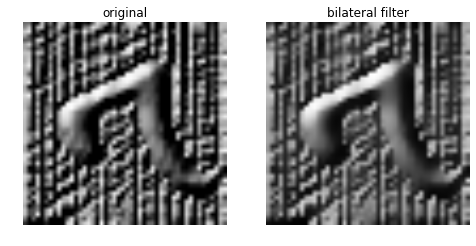

In [10]:
## Smoothing using bilateral filter ##
example_input = np.asarray(train_inputs[11])
raw_img = np.reshape(example_input, (48,48))

filtered_img=skimage.restoration.denoise_bilateral(raw_img, win_size = 5, sigma_range= None, sigma_spatial= 10, bins=10000, mode='constant', cval=0)
plot_comparison(raw_img,filtered_img,'bilateral filter')


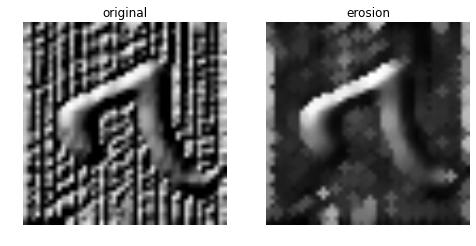

In [13]:
## Erosion ##
# The darder background will be eroded, leaving the brighter digits 

selem = disk(1)
eroded_img = opening(filtered_img, selem)
plot_comparison(raw_img,eroded_img,'erosion')

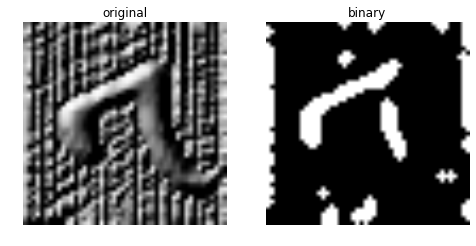

In [17]:
## Thresholding ##
# Turning the grey images into binary ones using ostu threshold
thresh = threshold_otsu(eroded_img)
binary_img = eroded_img > thresh
plot_comparison(raw_img,binary_img,'binary')


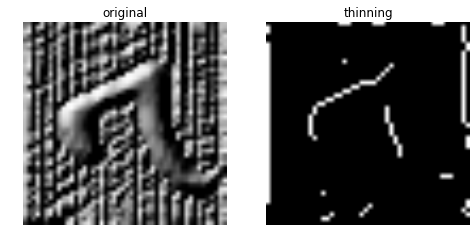

In [18]:
## Thinning(Skeletonize) ##
# Remove redundant line information
thinned_img = skeletonize(binary_img)
plot_comparison(raw_img,thinned_img,'thinning')
   

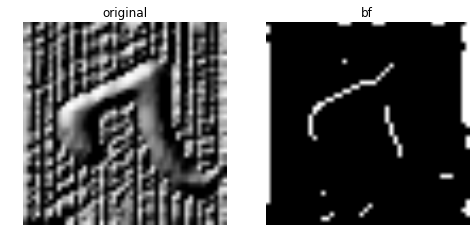

In [19]:
## Closing ##
# remove small dark spots and connect small bright cracks.
selem = disk(2)
closed_img = closing(thinned_img, selem)
plot_comparison(raw_img,closed_img,'bf')